# Create Labels from videos. Mark the shot boundaries.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
from lxml import etree
#%matplotlib inline

In [2]:
txt = None
# function to iterate over the folder videos
def create_labels_folder(srcFolderPath, destLabelFolder):
    fold_contents = os.listdir(srcFolderPath)
    t = 0
    print "Function called : "
    # Iterate over the folder contents
    for vid in fold_contents:
        print vid
        print vid.rsplit(".", 1)[1] in ['mp4', 'avi']
        if vid.rsplit(".", 1)[1] in ['mp4','avi']:
            create_vid_labels(os.path.join(srcFolderPath, vid), os.path.join(destLabelFolder, vid.rsplit(".",1)[0]+".txt"))
            t += 1
        if t == 1:  # stop after one video
            break

In [3]:
# function to read a single video for labeling. Label shots as a list of tuples 
# representing starting and ending frame numbers of shots.
def create_vid_labels(srcVideo, destFilePath):
    cap = cv2.VideoCapture(srcVideo)
    shotLabels = []
    i = 0
    
    if not cap.isOpened():
        print "Could not open the video file!! Check the path of the video. Abort."
        return False
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    c = 3
    
    fr_batch = np.zeros((5,5,h,w,c))
    
    # Iterate over the video
    while cap.isOpened() and i<length:
        try:
            #plt.close('all')
            #display.clear_output(wait=True)
            fig = plt.figure()
            # save frames in a batch
            for row in range(2):
                for col in range(1):
                    if i>=length:
                        break
            
                    i = cap.get(cv2.CAP_PROP_POS_FRAMES)
                    ret, frame = cap.read()
                    if ret:
                        fr_batch[row,col] = frame
                        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  #img = img[..., ::-1]
                        ax = plt.subplot(1, 2, (i%2)+1)
                        ax.set_title("F "+str(int(i)+1))
                        ax.axis('off')
                        ax.imshow(frame)
                        #if i%2 == 0:
                        #    cv2.imshow("Previous", frame)
                        #else:
                        #    cv2.imshow("Next", frame)
                    else:
                        print "Frame is NULL !"
            plt.show()
            #cv2.startWindowThread()
            direction = cv2.waitKey(10)
            print "Reached Here!!"
            #direction = waitTillEscPressed()
            #direction = raw_input()
            direction = 1
            direction = int(direction)
            if direction == 1:
                i +=1
                shotLabels.append(0)
            elif direction == 2:
                i += 1
                shotLabels.append(1)
            else:
                i -= 1
                shotLabels.pop()
        except KeyboardInterrupt:
            print "Interrupted here !!"
            break

    print "Labels of video : "+srcVideo
    print shotLabels
    cap.release()
    cv2.destoyAllWindows()
    #plt.close('all')
    return True

In [4]:
def waitTillEscPressed():
    while(True):
        if cv2.waitKey(10) == 97:
            print("Esc Pressed. Move Forward with labeling.")
            return 1
        elif cv2.waitKey(10) == 98:
            print("'b pressed. Move back.'")
            return 0
        elif cv2.waitKey(10) == 121:
            print("'y' pressed. Label and move forward.")
            return 2

Function called : 
3rd-test-alastair-cooks-190.m3u8
False
india-begin-kohli-era-with-record-win.TS
False
Ind Vs SL Champions Trophy Semi-Final.mp4
True


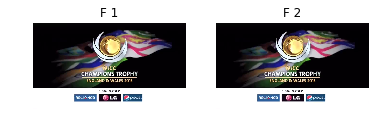

Reached Here!!


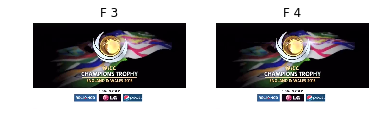

Reached Here!!


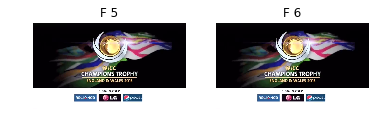

Reached Here!!


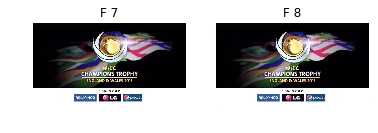

Reached Here!!


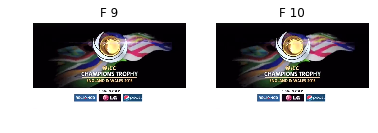

Reached Here!!


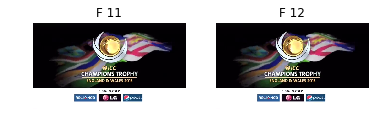

Reached Here!!


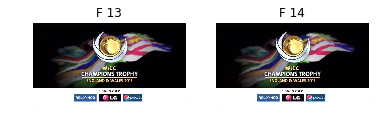

Reached Here!!


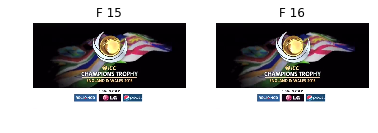

Reached Here!!


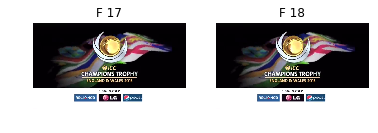

Reached Here!!


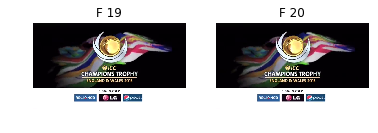

Reached Here!!


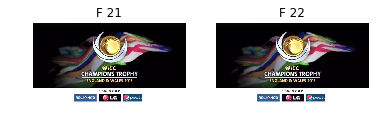

Reached Here!!


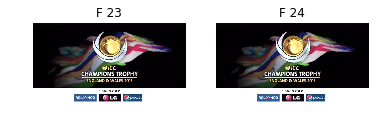

Reached Here!!


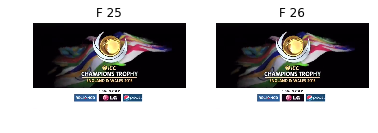

Reached Here!!


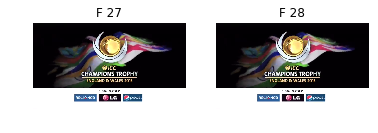

Reached Here!!


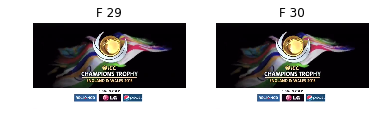

Reached Here!!


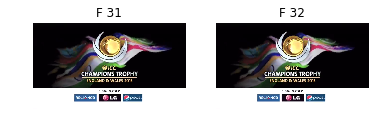

Reached Here!!


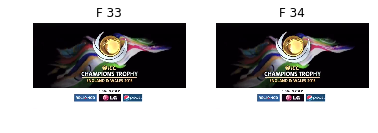

Reached Here!!


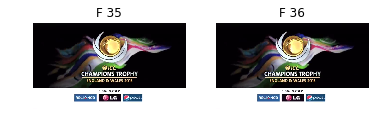

Reached Here!!


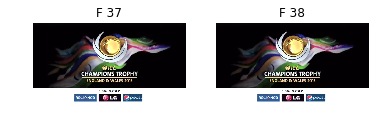

Reached Here!!


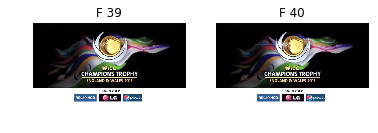

Reached Here!!


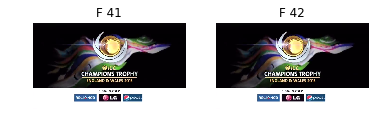

Reached Here!!


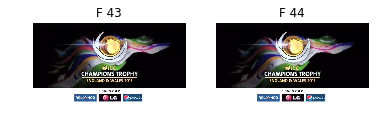

Reached Here!!


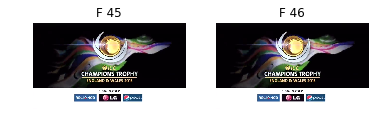

Reached Here!!


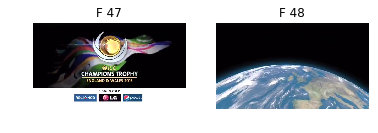

Reached Here!!


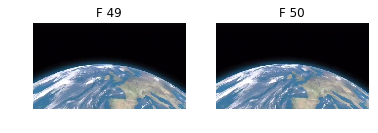

Reached Here!!


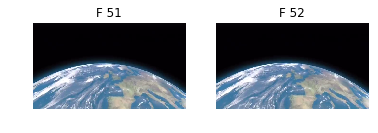

Reached Here!!


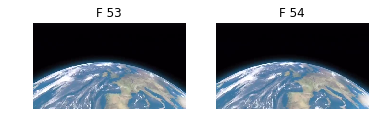

Reached Here!!


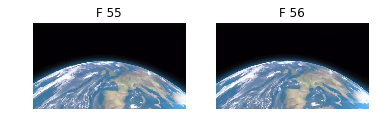

Reached Here!!


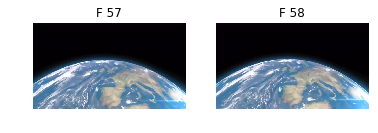

Reached Here!!


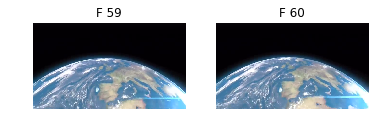

Reached Here!!


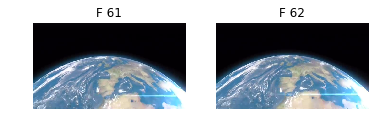

Reached Here!!


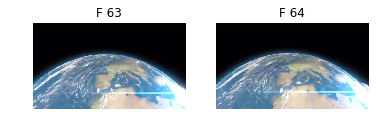

Reached Here!!


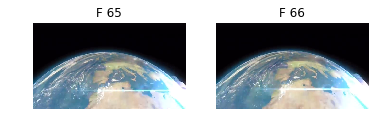

Reached Here!!


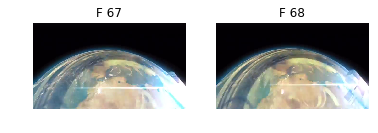

Reached Here!!


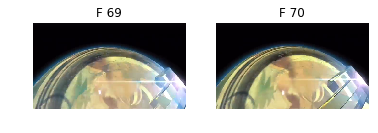

Reached Here!!


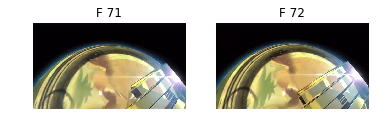

Reached Here!!


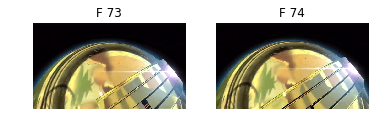

Reached Here!!


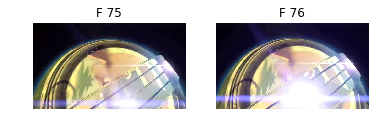

Reached Here!!


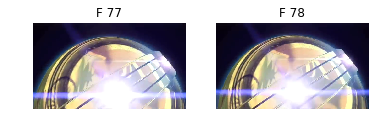

Reached Here!!


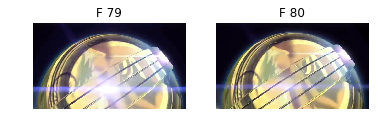

Reached Here!!


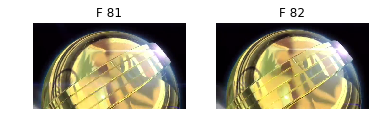

Reached Here!!


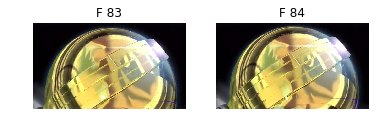

Reached Here!!


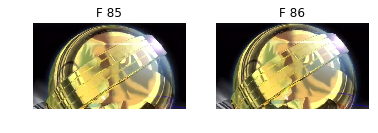

Reached Here!!


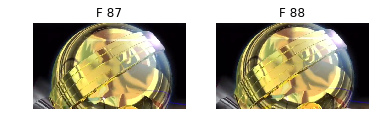

Reached Here!!


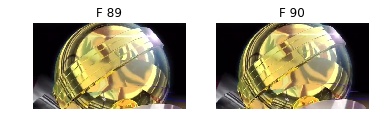

Reached Here!!


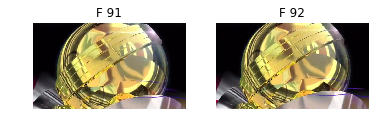

Reached Here!!


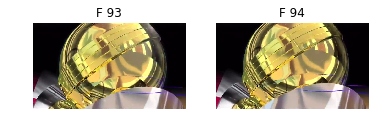

Reached Here!!


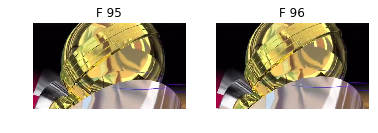

Reached Here!!


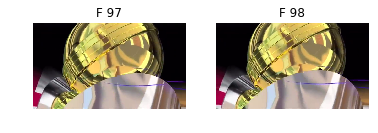

Reached Here!!


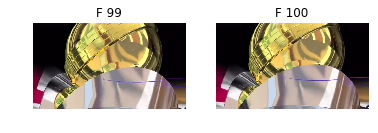

Reached Here!!


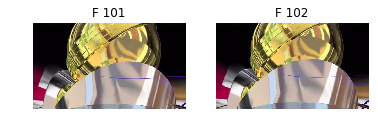

Reached Here!!


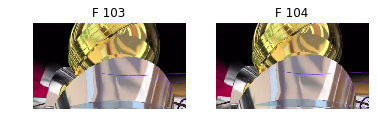

Reached Here!!


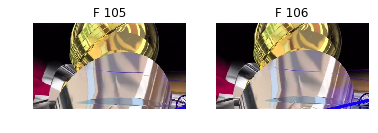

Reached Here!!


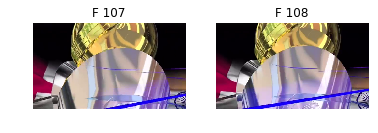

Reached Here!!


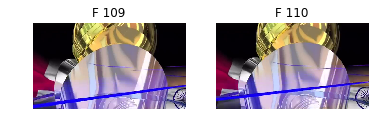

Reached Here!!


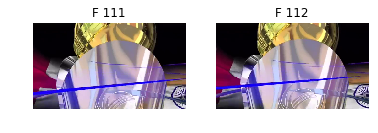

Reached Here!!


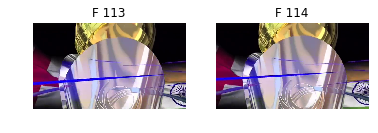

Reached Here!!


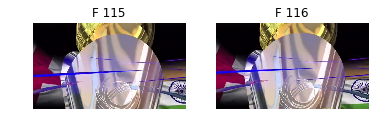

Reached Here!!


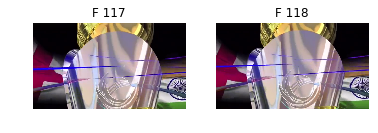

Reached Here!!


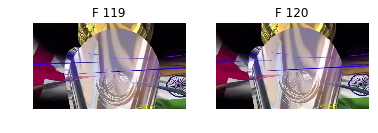

Reached Here!!


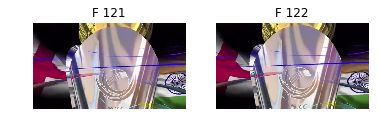

Reached Here!!


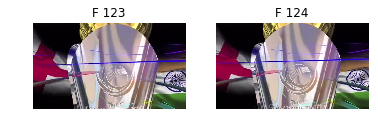

Reached Here!!


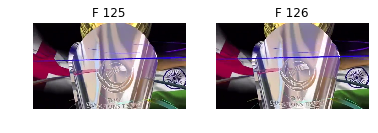

Reached Here!!


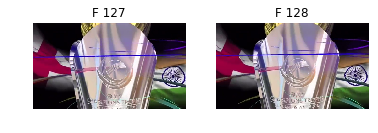

Reached Here!!


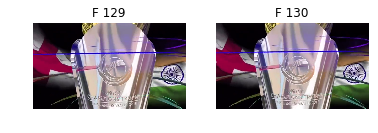

Reached Here!!


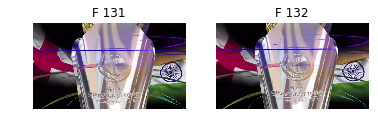

Reached Here!!


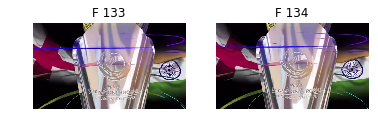

Reached Here!!


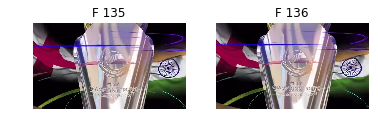

Reached Here!!
Interrupted here !!
Labels of video : /home/arpan/DATA_Drive/Cricket/hotstar_raw/Ind Vs SL Champions Trophy Semi-Final.mp4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


AttributeError: 'module' object has no attribute 'destoyAllWindows'

In [5]:
if __name__ == '__main__':
    
    srcVideoFolder = "/home/arpan/DATA_Drive/Cricket/hotstar_raw"
    destLabelFolder = "/home/arpan/VisionWorkspace/shot_detection/labels"
    
    create_labels_folder(srcVideoFolder, destLabelFolder)
    
    